<a href="https://colab.research.google.com/github/YangJisu0429/YangJisu/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
타이타닉 데이터 세트를 이용하여
* SGD분류
* 결정트리
* 랜덤포래스트
* 히스토그램기반 그래디언트 부스팅
모델을 만들고 최적화
"""


' \n타이타닉 데이터 세트를 이용하여\n* SGD분류\n* 결정트리\n* 랜덤포래스트\n* 히스토그램기반 그래디언트 부스팅\n모델을 만들고 최적화\n'

In [2]:
import pandas as pd
titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_input = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
test_target = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

In [3]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

test_input['Sex'] = test_input['Sex'].map({'male': 0, 'female': 1})
test_input['Embarked'] = test_input['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [4]:
train_input = titanic[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].to_numpy()
train_target = titanic['Survived'].to_numpy()

test_input = test_input[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].to_numpy()
test_target = test_target['Survived'].to_numpy()

In [5]:
from sklearn.impute import SimpleImputer

# SimpleImputer를 사용하여 결측값 대체
imputer = SimpleImputer(strategy='mean')
train_input = imputer.fit_transform(train_input)

test_input = imputer.fit_transform(test_input)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
# SGD분류
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=202035179)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7721661054994389
0.7416267942583732


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7833894500561167
0.9282296650717703


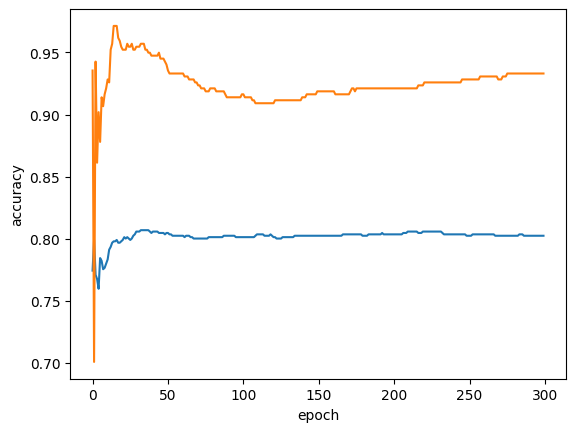

In [9]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=202035179)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(random_state=202035179)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.7200956937799043


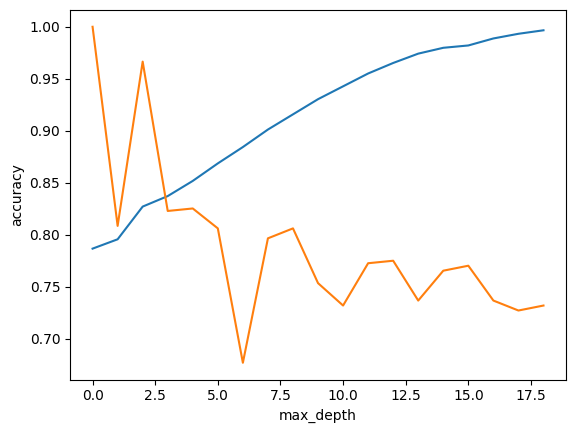

In [12]:
train_score = []
test_score = []

for i in range(1, 20):
  dt = DecisionTreeClassifier(max_depth=i, random_state=202035179)
  dt.fit(train_input, train_target)
  train_score.append(dt.score(train_input, train_target))
  test_score.append(dt.score(test_input, test_target))


plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [13]:
dt = DecisionTreeClassifier(max_depth=4, random_state=202035179)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8372615039281706
0.8229665071770335


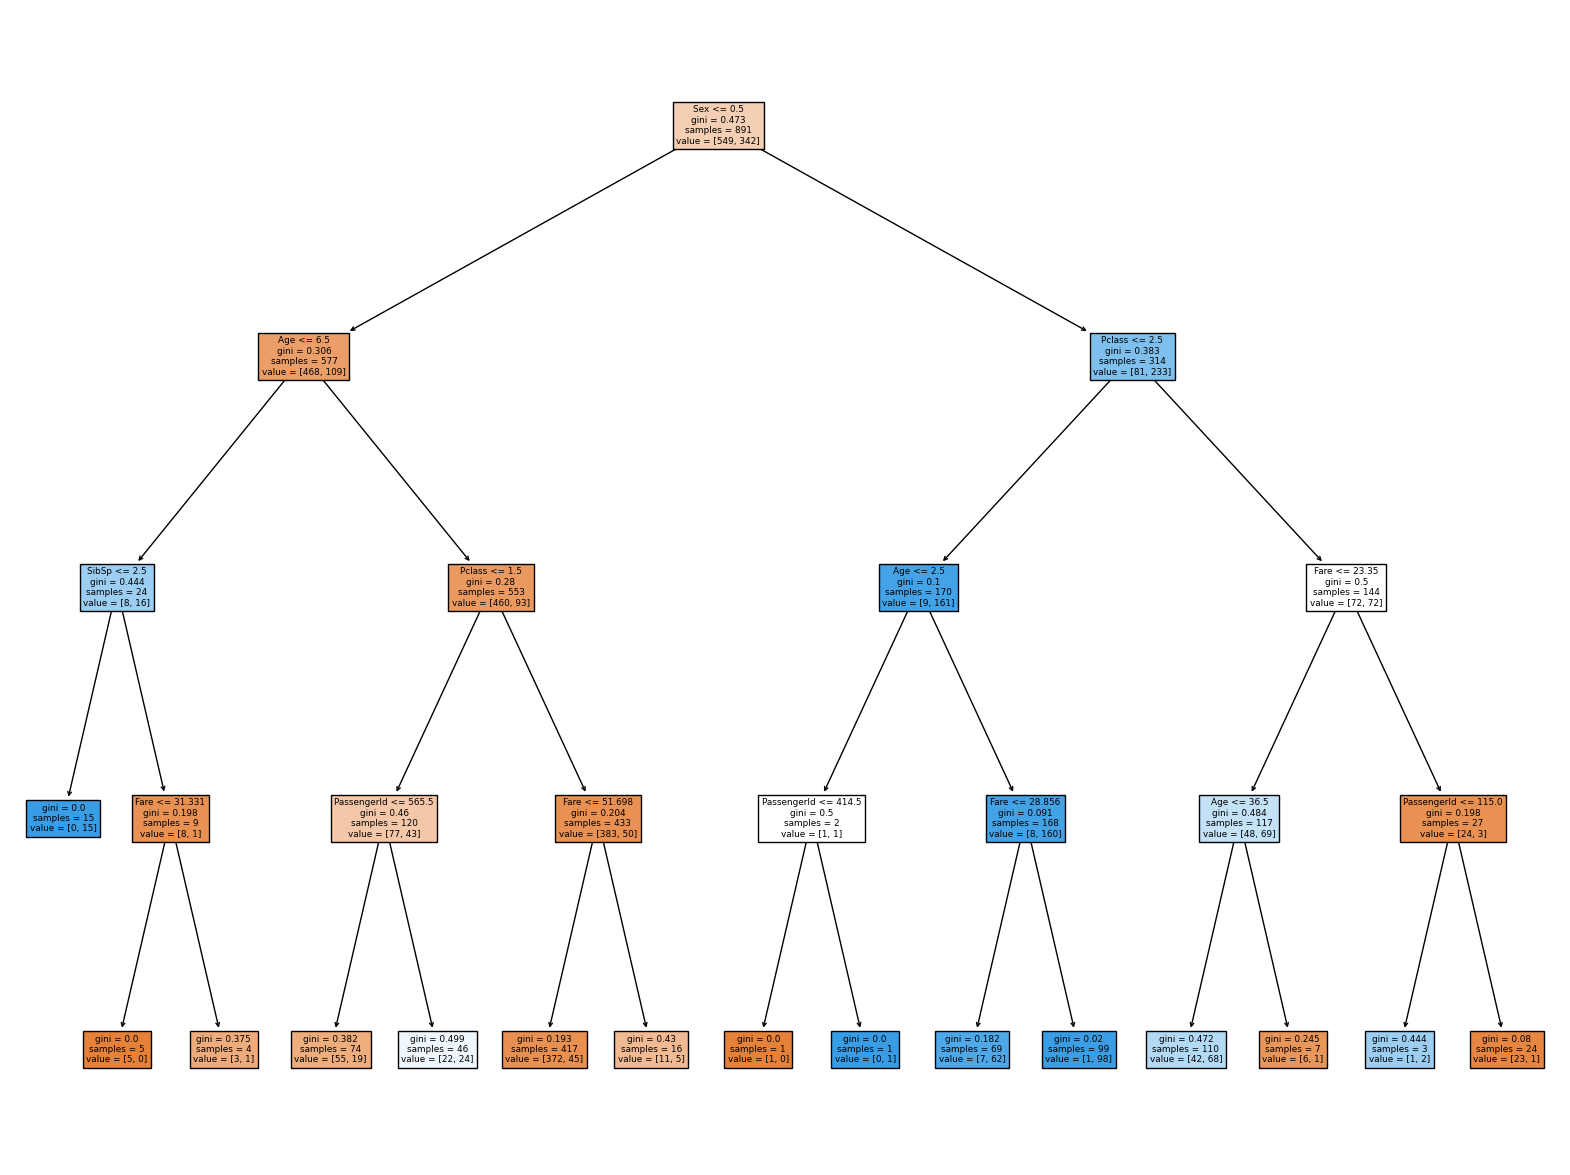

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
plt.show()

In [15]:
print(dt.feature_importances_)

[0.03362934 0.20104056 0.59210893 0.07240111 0.04229965 0.
 0.0585204  0.        ]


In [16]:
# 랜덤포래스트
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=202035179)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9991584852734923 0.8048145125855252


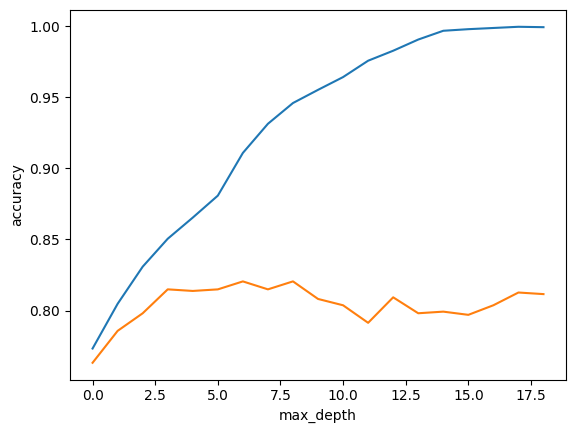

In [17]:
train_score = []
test_score = []

for i in range(1, 20):
  rf = RandomForestClassifier(max_depth=i, n_jobs=-1, random_state=202035179)
  scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

  train_score.append(np.mean(scores['train_score']))
  test_score.append(np.mean(scores['test_score']))


plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [18]:
rf = RandomForestClassifier(max_depth=6, n_jobs=-1, random_state=202035179)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.880754290306822 0.814864101437449


In [19]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.07812879 0.11657275 0.400208   0.10596862 0.04654797 0.03620382
 0.18626457 0.03010548]


In [20]:
rf.score(test_input, test_target)

0.8421052631578947

In [21]:
# 히스토그램기반 그래디언트 부스팅
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(max_iter=100, random_state=202035179)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9969140520352365 0.7802083987194777


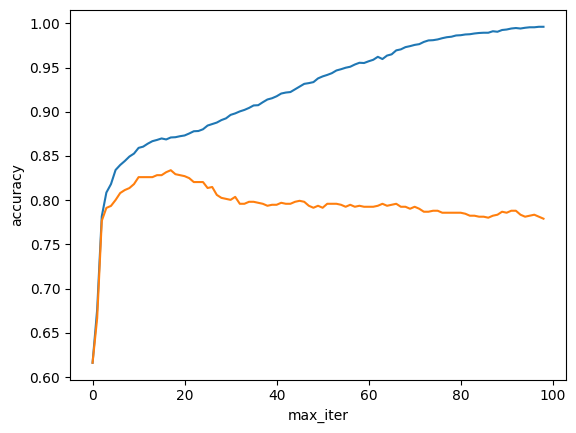

In [22]:
train_score = []
test_score = []

for i in range(1, 100):
  hgb = HistGradientBoostingClassifier(max_iter=i, random_state=202035179)
  scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

  train_score.append(np.mean(scores['train_score']))
  test_score.append(np.mean(scores['test_score']))


plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('max_iter')
plt.ylabel('accuracy')
plt.show()

In [23]:
hgb = HistGradientBoostingClassifier(max_iter=18, random_state=202035179)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8709314969191736 0.8339087314041805


In [24]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=202035179, n_jobs=-1)
print(result.importances_mean)

[0.02861953 0.12368126 0.21436588 0.05555556 0.01694725 0.
 0.05533109 0.00695847]


In [25]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=202035179, n_jobs=-1)
print(result.importances_mean)

[0.         0.03397129 0.27392344 0.01052632 0.00478469 0.
 0.01363636 0.02296651]


In [26]:
hgb.score(test_input, test_target)

0.861244019138756